In [6]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure


matplotlib.rcParams['figure.figsize'] = (12,8)

In [10]:
df = pd.read_csv('./movies.csv')

In [11]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [207]:
for col in df.columns:
    mean = np.mean(df[col].isnull())
    print('{} - {}'.format(col,mean))

name - 0.0
rating - 0.0
genre - 0.0
year - 0.0
released - 0.0
score - 0.0
votes - 0.0
director - 0.0
writer - 0.0
star - 0.0
country - 0.0
budget - 0.0
gross - 0.0
company - 0.0
runtime - 0.0


In [212]:
#cleaning the data

df.loc[df['country'].isnull(), 'country'] = 'Not available'
df.loc[df['company'].isnull(),'company'] = 'Not available'
df.loc[df['writer'].isnull(),'writer'] = 'Not available'
df.loc[df['star'].isnull(),'star'] = 'Not available'
df.loc[df['rating'].isnull(), 'rating'] = 'NR'
df.loc[df['budget'].isnull(), 'budget'] = 0
df.loc[df['gross'].isnull(), 'gross'] = 0
df.loc[df['runtime'].isnull(), 'runtime'] = 90
df.loc[df['votes'].isnull(), 'votes'] = 0
df.loc[df['score'].isnull(), 'score'] = 5.0

In [213]:
#converting to integers
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [214]:
a = df['released']
df['released'] = df['released'].str.replace(r"\(.*\)","", regex = True)                      

In [215]:
df['released'] = pd.to_datetime(df['released'])

In [216]:
df.loc[df['released'].isnull(), 'released'] = '1980-01-01'

In [ ]:
#Company is responsible for high gross
# Budges leads to high income (gross)

<function matplotlib.pyplot.show(close=None, block=None)>

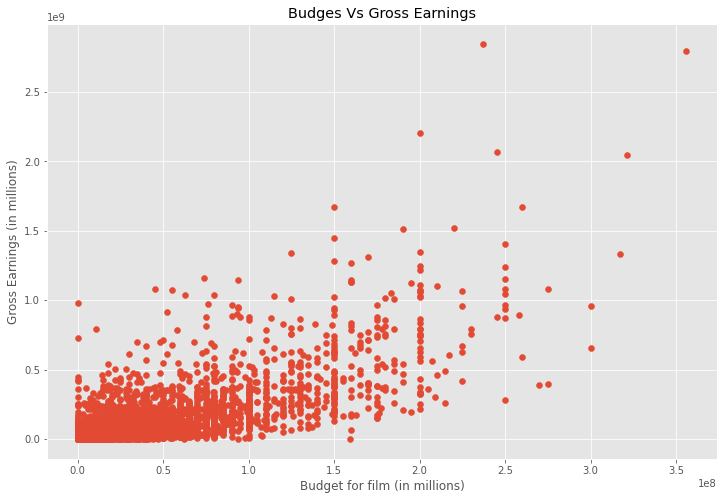

In [220]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budges Vs Gross Earnings')
plt.xlabel("Budget for film (in millions)")
plt.ylabel("Gross Earnings (in billions)")
plt.show

In [221]:
df.sort_values('gross')

name rating      genre  year  \
7667                                   Tee em el     NR     Horror  2020   
980                                      Malcolm  PG-13     Comedy  1986   
261                                      Frances      R  Biography  1982   
1822                    The Shrimp on the Barbie  PG-13     Comedy  1990   
460                               Young Warriors      R     Action  1983   
...                                          ...    ...        ...   ...   
7244                      Avengers: Infinity War  PG-13     Action  2018   
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
3045                                     Titanic  PG-13      Drama  1997   
7445                           Avengers: Endgame  PG-13     Action  2019   
5445                                      Avatar  PG-13     Action  2009   

       released  score    votes               director              writer  \
7667 2020-08-19    5.7        7           Pereko Mosia        Pereko Mosia   
980  1986-11-05    7.1     2100             Nadia Tass        David Parker   
261  1983-03-11    7.3     7300        Graeme Clifford        Eric Bergren   
1822 1990-08-31    5.7     1200               Director        Grant Morris   
460  1983-08-28    4.7      460  Lawrence David Foldes   Russell W. Colgin   
...         ...    ...      ...                    ...                 ...   
7244 2018-04-27    8.4   897000          Anthony Russo  Christopher Markus   
6663 2015-12-18    7.8   876000            J.J. Abrams     Lawrence Kasdan   
3045 1997-12-19    7.8  1100000          James Cameron       James Cameron   
7445 2019-04-26    8.4   903000          Anthony Russo  Christopher Markus   
5445 2009-12-18    7.8  1100000          James Cameron       James Cameron   

                   star        country     budget       gross  \
7667   Siyabonga Mabaso   South Africa          0           0   
980        Colin Friels      Australia          0           0   
261       Jessica Lange  United States          0           0   
1822       Cheech Marin      Australia          0           0   
460     Ernest Borgnine  United States          0           0   
...                 ...            ...        ...         ...   
7244  Robert Downey Jr.  United States  321000000  2048359754   
6663       Daisy Ridley  United States  245000000  2069521700   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
7445  Robert Downey Jr.  United States  356000000  2797501328   
5445    Sam Worthington  United States  237000000  2847246203   

                    company  runtime  
7667            PK 65 Films      102  
980           Cascade Films       85  
261             Brooksfilms      140  
1822         Unity Pictures       90  
460             Star Cinema      105  
...                     ...      ...  
7244         Marvel Studios      149  
6663              Lucasfilm      138  
3045  Twentieth Century Fox      194  
7445         Marvel Studios      181  
5445  Twentieth Century Fox      162  

[7668 rows x 15 columns]

<AxesSubplot:xlabel='budget', ylabel='gross'>

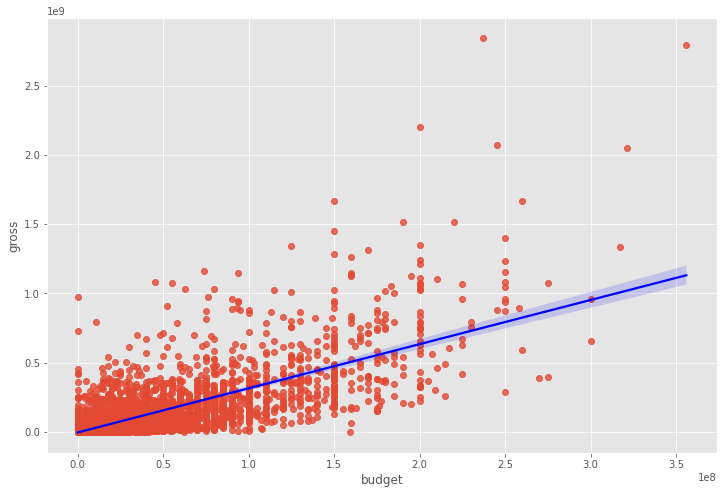

In [223]:
import seaborn as sns
#Plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross', data=df, line_kws={"color": 'blue'})

In [228]:
#Types of correlation Pearson(default), kendall, spearman
df.corr() 

year     score     votes    budget     gross   runtime
year     1.000000  0.096910  0.222427  0.309212  0.261900  0.120192
score    0.096910  1.000000  0.409297  0.056004  0.186571  0.399380
votes    0.222427  0.409297  1.000000  0.486931  0.632870  0.309129
budget   0.309212  0.056004  0.486931  1.000000  0.750157  0.269619
gross    0.261900  0.186571  0.632870  0.750157  1.000000  0.245366
runtime  0.120192  0.399380  0.309129  0.269619  0.245366  1.000000

Text(87.0, 0.5, 'Movie features')

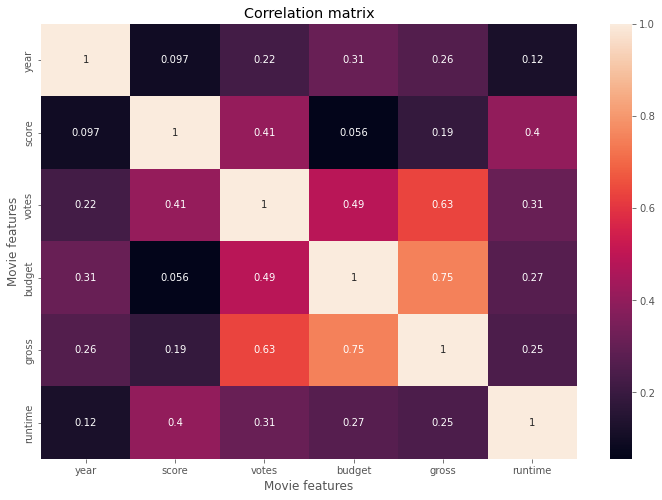

In [236]:
#HIgh correlation between and gross
#visualizing the correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

In [246]:
df_new = df
for col in df_new.columns:
    if(df_new[col].dtype == 'object' and col !='name'):
        df_new[col] = df_new[col].astype('category')
        df_new[col] = df_new[col].cat.codes

name  rating  genre  year   released  score    votes  director  writer  \
0     6587       7      6  1980 1980-06-13    8.4   927000      2589    4015   
1     5573       7      1  1980 1980-07-02    5.8    65000      2269    1632   
2     5142       5      0  1980 1980-06-20    8.7  1200000      1111    2567   
3      286       5      4  1980 1980-07-02    7.7   221000      1301    2000   
4     1027       7      4  1980 1980-07-25    7.3   108000      1054     521   
5     2109       7     10  1980 1980-05-09    6.4   123000      2528    4363   
6     5574       7      0  1980 1980-06-20    7.9   188000      1412     838   
7     4436       7      3  1980 1980-12-19    8.2   330000      1829    1769   
8     5281       5      0  1980 1981-06-19    6.8   101000      2306    1979   
9     6213       7      3  1980 1980-05-16    7.0    10000      2864     423   
10     463       5      0  1980 1980-12-17    6.1    18000       357    3986   
11    5920       5      1  1980 1984-10-26    7.3    54000      1199    1832   
12    4315       5      1  1980 1980-12-12    5.3    30000      2352    2333   
13    4084       7      6  1980 1980-09-19    7.7    49000      2388    2327   
14    1687       7      5  1980 1980-07-25    7.1    37000       318     520   
15    5024       5      6  1980 1980-10-03    7.2    27000      1243    3549   
16    1900       7      6  1980 1980-05-16    6.6    21000        49     735   
17      92       5      4  1980 1980-12-19    6.9    29000       514    3263   
18    5865       7     10  1980 1980-02-08    6.8    66000      1374    2104   
19    5189       7      4  1980 1980-12-12    6.8    26000      2561     556   
20    1387       7      5  1980 1980-02-15    6.5    20000      2891    4452   
21    2451       7      1  1980 1981-04-24    6.8    14000      1892    2926   
22    5845       5      0  1980 1980-08-01    6.7    22000       744    4193   
23    7445       5      8  1980 1980-08-08    5.3    12000      2371    3529   
24    7127       5      6  1980 1980-06-06    6.4    14000      1153      12   
25     346       7     10  1980 1980-12-25    6.9    33000      1583    3235   
26    3263       7      4  1980 1980-03-21    6.5     5100      2433    2483   
27    4442       5      0  1980 1980-08-01    5.0     4100      1282      33   
28     980       7      5  1980 1980-06-20    7.2    17000      2673    4387   
29     362       7      5  1980 1980-02-01    6.2    22000      2151    3327   
30    3796       5      4  1980 1980-09-26    7.1     8900      2811      83   
31    4373       7     10  1980 1980-07-18    5.4    16000      2143    4456   
32    4987       5      0  1980 1980-08-15    5.3    15000      1041    1587   
33    1103       5      6  1980 1981-04-24    6.1      604      1644     958   
34    4785       5      4  1980 1980-12-19    6.7     9100      1225    3136   
35    4362       7      4  1980 1980-10-10    6.2    24000      1091    3107   
36    6008       7      4  1980 1980-05-30    6.3     4300       855    1358   
37    3721       7      4  1980 1980-10-24    6.0    11000      1598    3643   
38    6102       5      6  1980 1980-12-19    5.9     4000      2296    3827   
39    1244       5      3  1980 1980-03-07    7.5    17000      1884    4202   
40    6748       5      7  1980 1981-10-09    6.3     5700      1403     518   
41     927       5      6  1980 1980-07-03    7.9    13000       335    2252   
42    6644       7      0  1980 1980-06-27    7.1     9000      2314    2543   
43    7305       7      3  1980 1980-04-25    6.6    11000       186    1682   
44    5504       7     10  1980 1980-10-31    4.8     2000      1978     151   
45    1152       7      4  1980 1980-07-18    6.1    12000      2804    4299   
46    6094       7      0  1980 1980-06-13    5.3     3900      1934    3358   
47    5578       7     10  1980 1980-11-07    4.6     3900      2836    4345   
48    6360       5      0  1980 1980-05-09    5.1     3100       509    2893   
49    

In [252]:
correlate = df_new.corr()

Text(87.0, 0.5, 'Movie features')

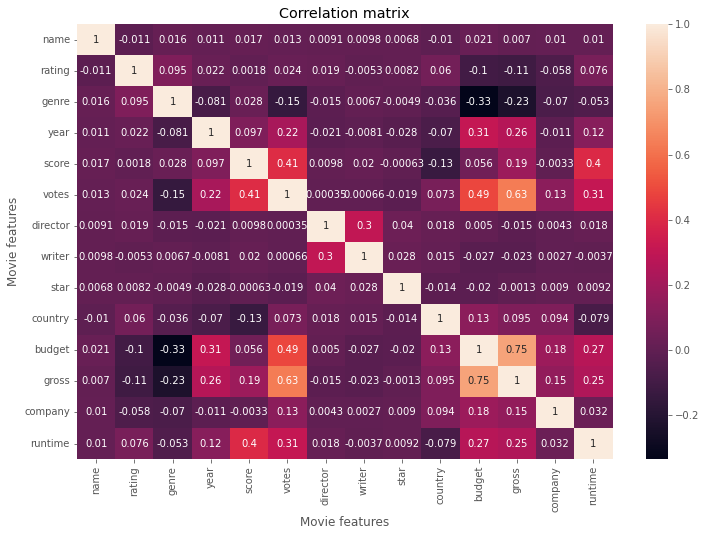

In [254]:
sns.heatmap(correlate, annot=True)
plt.title('Correlation matrix')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

In [266]:
sorted_pairs = df_new.corr().unstack().sort_values()
sorted_high = sorted_pairs[sorted_pairs > 0.5]
sorted_high

gross     votes       0.632870
votes     gross       0.632870
budget    gross       0.750157
gross     budget      0.750157
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Budget and Votes relates with gross earnings